In [8]:
import pandas as pd

csv_path = "/Users/willevans/Desktop/Spotify_2024_Global_Streaming_Data.csv"
df = pd.read_csv(csv_path)
df = df.drop("Genre", 
print(df.head())



         Country        Artist                    Album      Genre  \
0        Germany  Taylor Swift  1989 (Taylor's Version)      K-pop   
1         Brazil    The Weeknd              After Hours        R&B   
2  United States   Post Malone                   Austin  Reggaeton   
3          Italy    Ed Sheeran        Autumn Variations      K-pop   
4          Italy    Ed Sheeran        Autumn Variations        R&B   

   Release Year  Monthly Listeners (Millions)  Total Streams (Millions)  \
0          2019                         23.10                   3695.53   
1          2022                         60.60                   2828.16   
2          2023                         42.84                   1425.46   
3          2018                         73.24                   2704.33   
4          2023                          7.89                   3323.25   

   Total Hours Streamed (Millions)  Avg Stream Duration (Min) Platform Type  \
0                         14240.35               

In [9]:
!pip install scikit-learn

In [10]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [11]:
# Encode categorical variables
df_encoded = df.copy()
label_cols = ["Country", "Artist", "Album", "Genre", "Platform Type"]
for col in label_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df[col])

# Features & target
X = df_encoded.drop(columns=["Total Streams (Millions)"])
y = df_encoded["Total Streams (Millions)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred) 
print("R-Squared:", r2)

MSE: 244104.49507698545
R-Squared: 0.8673429251783812


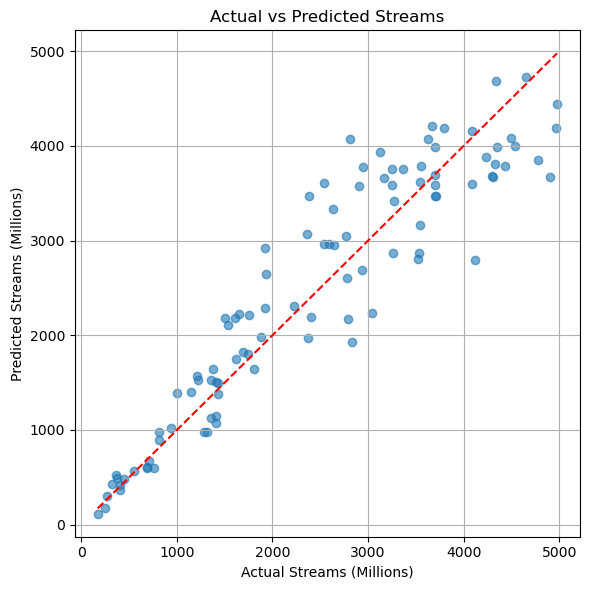

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Streams (Millions)")
plt.ylabel("Predicted Streams (Millions)")
plt.title("Actual vs Predicted Streams")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid()
plt.tight_layout()
plt.show()

In [15]:
# Suppose these are your actual and predicted values
import pandas as pd

# Assuming `y_test` are the actual values, `y_pred` are the predicted, and `X_test` includes artist info
results = X_test.copy()
results["Actual Streams"] = y_test
results["Predicted Streams"] = y_pred

# Group by artist
grouped = results.groupby("Artist")[["Actual Streams", "Predicted Streams"]].mean().reset_index()

# Save to CSV
grouped.to_csv("/Users/willevans/Desktop/stream_prediction_results_grouped.csv", index=False)

In [21]:
# Load required packages
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/willevs1/MusicML/main/Spotify_2024_Global_Streaming_Data.csv")

print(df.head())

         Country        Artist                    Album      Genre  \
0        Germany  Taylor Swift  1989 (Taylor's Version)      K-pop   
1         Brazil    The Weeknd              After Hours        R&B   
2  United States   Post Malone                   Austin  Reggaeton   
3          Italy    Ed Sheeran        Autumn Variations      K-pop   
4          Italy    Ed Sheeran        Autumn Variations        R&B   

   Release Year  Monthly Listeners (Millions)  Total Streams (Millions)  \
0          2019                         23.10                   3695.53   
1          2022                         60.60                   2828.16   
2          2023                         42.84                   1425.46   
3          2018                         73.24                   2704.33   
4          2023                          7.89                   3323.25   

   Total Hours Streamed (Millions)  Avg Stream Duration (Min) Platform Type  \
0                         14240.35               

In [44]:
df = pd.read_csv(csv_path)

df = df.drop(['Genre','Release Year','Album','Platform Type'],axis=1)
print(df.head())


         Country        Artist  Monthly Listeners (Millions)  \
0        Germany  Taylor Swift                         23.10   
1         Brazil    The Weeknd                         60.60   
2  United States   Post Malone                         42.84   
3          Italy    Ed Sheeran                         73.24   
4          Italy    Ed Sheeran                          7.89   

   Total Streams (Millions)  Total Hours Streamed (Millions)  \
0                   3695.53                         14240.35   
1                   2828.16                         11120.44   
2                   1425.46                          4177.49   
3                   2704.33                         12024.08   
4                   3323.25                         13446.32   

   Avg Stream Duration (Min)  Streams Last 30 Days (Millions)  Skip Rate (%)  
0                       4.28                           118.51           2.24  
1                       3.90                            44.87          2

In [43]:
artist_streams = df.groupby("Artist")["Total Streams (Millions)"].sum().reset_index()

artist_streams = artist_streams.sort_values(by="Total Streams (Millions)", ascending=False).reset_index()
artist_streams = artist_streams.drop(['index'],axis=1)

print(artist_streams.head())

      Artist  Total Streams (Millions)
0        BTS                 124299.47
1   Dua Lipa                 111305.99
2  Bad Bunny                 106216.16
3  BLACKPINK                 102238.89
4   Doja Cat                  90098.83
